In [5]:
len_x_ARMA = 60
len_y_nextday = 1
scale_method = "minmax"
model_save_path = "saved_model_cnn1"

In [1]:
from kospi_predict import Crawler

cols = [
    "KOSPI", "KOSPI_START", "KOSPI_HIGH", "KOSPI_LOW", "KOSPI_VOL", "KOSPI_VAL", "KOSPI_HIGH_LOW_GAP",
    "NASDAQ", "NASDAQ_START", "NASDAQ_HIGH", "NASDAQ_LOW", "NASDAQ_VOL",
    "DOW", "DOW_START", "DOW_HIGH", "DOW_LOW", "DOW_VOL",
    "NIKKEI", "NIKKEI_START", "NIKKEI_HIGH", "NIKKEI_LOW", "NIKKEI_VOL",
    "SHANGHAI", "SHANGHAI_START", "SHANGHAI_HIGH", "SHANGHAI_LOW", "SHANGHAI_VOL",
    "INDI", "FOREIGN", "ORG",
    "CR",
    "GOLD"
]

crawler = Crawler(crawl_page_max=30, perPage=100)
# crawler.crawlData(cols, save=True)
crawler.loadFromSavedFile(cols)
df_crawled = crawler.removeNan()
# df_crawled = df_crawled.loc[:2000]
df_crawled

,date,KOSPI,KOSPI_START,KOSPI_HIGH,KOSPI_LOW,KOSPI_VOL,KOSPI_VAL,KOSPI_HIGH_LOW_GAP,NASDAQ,NASDAQ_START,...,SHANGHAI,SHANGHAI_START,SHANGHAI_HIGH,SHANGHAI_LOW,SHANGHAI_VOL,INDI,FOREIGN,ORG,CR,GOLD
0,2023-04-28,2501.53,2511.79,2517.13,2489.58,777535095,14024831081451,-27.55,12142.238,12117.544,...,294.366,292.561,294.481,292.352,258384.0,1.360082e+11,3.004571e+11,-3.550564e+11,1341.0,1983.29
1,2023-04-27,2495.81,2484.31,2499.01,2465.83,733499935,11142114587400,-33.18,11854.351,11972.147,...,292.365,292.255,293.129,291.784,156092.0,1.868206e+11,2.826059e+11,-4.851069e+11,1341.0,1998.14
2,2023-04-26,2484.83,2489.49,2498.56,2481.38,1089215527,12397513675358,-17.18,11799.157,11913.232,...,292.308,291.216,292.645,290.786,186219.0,2.218766e+11,-9.139846e+10,-1.549624e+11,1338.5,1997.63
3,2023-04-25,2489.02,2531.35,2531.35,2472.33,886421798,13681150419767,-59.02,12037.204,11968.808,...,291.401,292.199,293.163,289.257,186435.0,-2.256127e+09,8.622928e+09,5.870307e+07,1341.0,1989.68
4,2023-04-24,2523.50,2538.36,2541.89,2518.73,927191299,11589467033126,-23.16,12072.456,12053.467,...,292.260,292.013,293.438,291.557,203979.0,-8.280490e+10,-3.676363e+10,1.043359e+11,1334.5,1986.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2014-04-02,1997.25,2000.13,2001.26,1995.08,220913202,3990737053146,-6.18,4268.040,4281.607,...,227.157,226.886,228.049,226.687,201000.0,-9.404481e+10,5.607124e+10,4.699805e+10,1058.0,1283.00
2234,2014-04-01,1991.98,1983.78,1991.98,1976.06,214641821,3928821531496,-15.92,4198.994,4219.873,...,227.100,225.025,227.245,224.782,153000.0,-7.481867e+10,5.723630e+10,2.308877e+10,1058.1,1287.68
2235,2014-03-31,1985.61,1988.73,1989.80,1973.05,241040678,4468746178897,-16.75,4155.759,4185.625,...,224.986,226.859,227.531,223.558,284000.0,3.480548e+10,-1.698837e+10,-7.795431e+09,1063.5,1292.78
2236,2014-03-28,1981.00,1972.63,1985.50,1971.25,244600277,3446078839989,-14.25,4151.232,4163.175,...,226.795,226.691,227.502,225.625,403000.0,-1.673696e+11,2.335767e+11,-7.127617e+10,1068.7,1295.98


In [6]:
from kospi_predict import DataPreprocessor
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler

dpp = DataPreprocessor(df_crawled, cols, scale_method, model_save_path)
dpp.sortByDate()
# dpp.makeDiffByRange(1, len_x_ARMA)
# dpp.makeDiffRatio()
# dpp.makeAR(0, len_x_ARMA)
# dpp.makeMA(2, len_x_ARMA)
dpp.makeTargetYs(len_y_nextday)
dpp.cutoffData(len_x_ARMA, len_y_nextday)

In [7]:
# df = dpp.df[500:1500]
# df.reset_index(drop=True, inplace=True)
dpp.df

,date,KOSPI,KOSPI_START,KOSPI_HIGH,KOSPI_LOW,KOSPI_VOL,KOSPI_VAL,KOSPI_HIGH_LOW_GAP,NASDAQ,NASDAQ_START,...,SHANGHAI_START,SHANGHAI_HIGH,SHANGHAI_LOW,SHANGHAI_VOL,INDI,FOREIGN,ORG,CR,GOLD,Y_KOSPI_nextday_1
0,2014-06-27,1988.51,1990.90,1997.01,1983.88,218844990,3395118807857,-13.13,4379.046,4371.800,...,219.720,220.780,219.602,155000.0,2.628406e+09,-3.999679e+09,4.493030e+09,1014.5,1316.08,2002.21
1,2014-06-30,2002.21,1996.13,2002.21,1992.65,201128111,2989877070056,-9.56,4397.930,4398.366,...,220.673,221.522,220.400,200000.0,-2.053198e+10,2.555607e+10,-2.518148e+09,1011.8,1312.50,1999.00
2,2014-07-01,1999.00,1993.29,1999.00,1987.89,238870813,3004954923884,-11.11,4408.178,4424.706,...,221.181,222.013,220.857,160000.0,-7.275962e+10,2.392553e+10,5.735100e+10,1011.2,1326.45,2015.28
3,2014-07-02,2015.28,2008.00,2016.36,2002.40,318423490,3854654534211,-13.96,4458.651,4457.858,...,222.005,223.069,221.136,174000.0,-2.444938e+11,3.147873e+11,-4.995202e+10,1008.0,1325.40,2010.97
4,2014-07-03,2010.97,2015.99,2015.99,2007.86,259913596,3515649244769,-8.13,4457.734,4472.891,...,222.966,223.748,222.450,266000.0,-2.376206e+10,1.591954e+11,-1.167735e+11,1008.8,1322.38,2009.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,2023-04-21,2544.40,2556.70,2559.44,2532.32,970397971,12614672834698,-27.12,12059.558,12046.033,...,295.015,295.889,291.335,258731.0,-1.949021e+11,2.800835e+11,-8.406796e+10,1332.0,1988.30,2523.50
2172,2023-04-24,2523.50,2538.36,2541.89,2518.73,927191299,11589467033126,-23.16,12072.456,12053.467,...,292.013,293.438,291.557,203979.0,-8.280490e+10,-3.676363e+10,1.043359e+11,1334.5,1986.55,2489.02
2173,2023-04-25,2489.02,2531.35,2531.35,2472.33,886421798,13681150419767,-59.02,12037.204,11968.808,...,292.199,293.163,289.257,186435.0,-2.256127e+09,8.622928e+09,5.870307e+07,1341.0,1989.68,2484.83
2174,2023-04-26,2484.83,2489.49,2498.56,2481.38,1089215527,12397513675358,-17.18,11799.157,11913.232,...,291.216,292.645,290.786,186219.0,2.218766e+11,-9.139846e+10,-1.549624e+11,1338.5,1997.63,2495.81


In [8]:
import cv2
import numpy as np
import pandas as pd

def rescalingByMinMax(arr):
    for col_idx in range(arr.shape[1]):
        this_arr = arr[:, col_idx]
        max_val = max(this_arr)
        min_val = min(this_arr)
        for row_idx, val in enumerate(this_arr):
            new_val = (val - min_val) / (max_val - min_val)
            arr[row_idx, col_idx] = new_val
    return arr

def makeImage3D(df, row_cnt = 8):
    img_list = []
    label_list = []
    date_list = []
    y_list = []
    for idx in range(len(df)):
        if idx > 200:
            this_mat = np.empty(shape=(row_cnt, len(cols), 3))
            for i in range(1, 4):
                this_ch = rescalingByMinMax(np.array(df.iloc[idx-(row_cnt*i):idx-(row_cnt*(i-1)), 1:len(cols)+1], dtype=np.float32))
                this_mat[:, :, i-1] = this_ch
            img_list.append(this_mat)

            #라벨 체크
            this_label = np.nan
            if idx+1 < len(df): #0 1 2 ... 29 / 30
                this_label = 0
                if df.iloc[idx+1, 1] > df.iloc[idx, 1]: #item[0]+1 : 다음날
                    this_label = 1
            label_list.append(this_label)

            #라벨값과 함께 이미지로 저장
            cv2.imwrite("../data_cnn/{}_{}.png".format(str(this_label), df.iloc[idx, 0]), this_mat * 255)

            #날짜 리스트 입력
            date_list.append(df.iloc[idx, 0])

            #y_list 입력
            y_list.append(df.iloc[idx, -1])

    img_list = np.array(img_list[:-1])
    label_list = np.array(label_list[:-1], dtype=np.uint8)
    date_list = np.array(date_list[:-1])
    y_list = np.array(y_list[:-1])
    df_result = pd.DataFrame({"date" : date_list, "label" : label_list})

    return img_list, label_list, date_list, y_list, df_result

img_list, label_list, date_list, y_list, df_ref = makeImage3D(dpp.df, row_cnt=len(cols))
img_list.shape, label_list.shape, date_list.shape, y_list.shape

((1974, 32, 32, 3), (1974,), (1974,), (1974,))

In [9]:
df_ref

,date,label
0,2015-04-22,1
1,2015-04-23,0
2,2015-04-24,0
3,2015-04-27,0
4,2015-04-28,0
...,...,...
1969,2023-04-20,0
1970,2023-04-21,0
1971,2023-04-24,0
1972,2023-04-25,0


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_list[:-1], label_list[:-1], test_size=0.2, shuffle=False, random_state=8699)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1578, 32, 32, 3), (395, 32, 32, 3), (1578,), (395,))

In [11]:
import tensorflow as tf

model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(32, 32, 3), pooling="max")

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.summary()

epochs=2000
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  batch_size = 128,
  validation_split = 0.2,
  verbose = 1
)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-29 22:00:01.958516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-29 22:00:01.958655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

2023-04-29 22:00:03.600409: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-29 22:00:06.496502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 11.3412 - accuracy: 0.0016    

2023-04-29 22:00:20.838386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 20s 996ms/step - loss: 11.3412 - accuracy: 0.0016 - val_loss: 12.2424 - val_accuracy: 0.0000e+00
Epoch 2/2000
10/10 [==============================] - 3s 328ms/step - loss: 8.3495 - accuracy: 0.0024 - val_loss: 12.3510 - val_accuracy: 0.0000e+00
Epoch 3/2000
10/10 [==============================] - 3s 314ms/step - loss: 7.3115 - accuracy: 0.0016 - val_loss: 6.4055 - val_accuracy: 0.0000e+00
Epoch 4/2000
10/10 [==============================] - 3s 316ms/step - loss: 6.8488 - accuracy: 0.0000e+00 - val_loss: 5.8584 - val_accuracy: 0.0000e+00
Epoch 5/2000
10/10 [==============================] - 3s 315ms/step - loss: 6.1883 - accuracy: 0.0127 - val_loss: 5.6073 - val_accuracy: 0.0000e+00
Epoch 6/2000
10/10 [==============================] - 3s 333ms/step - loss: 4.7194 - accuracy: 0.2298 - val_loss: 5.2284 - val_accuracy: 0.5886
Epoch 7/2000
10/10 [==============================] - 3s 315ms/step - loss: 3.5670 - accuracy: 0.3693 - val_loss: 4.3853 

<Axes: >

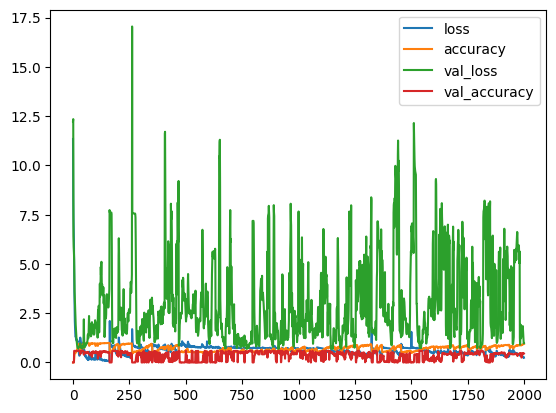

In [12]:
df_history = pd.DataFrame(history.history)
df_history.plot()

<Axes: >

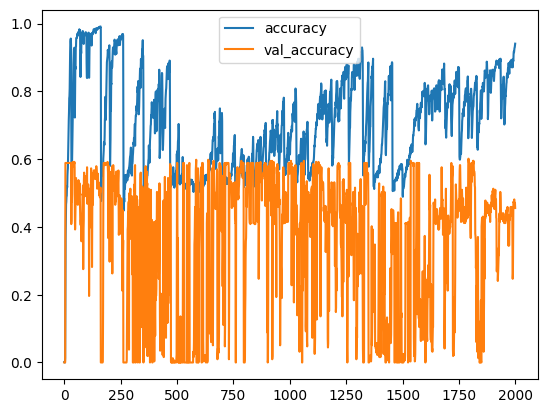

In [13]:
df_history[["accuracy", "val_accuracy"]].plot() 

In [ ]:
preds = model.predict(x_test)
test_results = []
for idx, pred in enumerate(preds):
    this_label = y_test[idx]
    this_predict = np.argmax(pred)
    acc = 0
    if this_label == this_predict:
        acc = 1
    test_results.append({"label" : this_label, "predict" : this_predict, "acc" : acc})

test_results = pd.DataFrame(test_results)
test_results

In [ ]:
acc_ratio = test_results["acc"].sum() / len(test_results)
print("테스트 정확도 : {}/{} ({:.2f})".format(test_results["acc"].sum(), len(test_results), acc_ratio))

최근 날짜로 테스트

In [ ]:
crawler_pred = Crawler(crawl_page_max=1, perPage=100) #이전 추세도 볼겸 넉넉히 수집
crawler_pred.crawlData(cols)
df_crawled_pred = crawler_pred.removeNan()
df_crawled_pred

In [ ]:
#아래는 예측을 위한 전처리
dpp_pred = DataPreprocessor(df_crawled_pred.loc[:100], cols, scale_method, model_save_path)
dpp_pred.sortByDate()
dpp_pred.makeDiffRatio()
dpp_pred.scalingForPredict()
dpp_pred.makeAR(0, len_x_ARMA)
dpp_pred.makeMA(2, len_x_ARMA)
dpp_pred.cutoffData(len_x_ARMA, 0)

In [ ]:
dpp_pred.df

In [ ]:
img_pred_list, label_pred_list, date_list, _ = makeImage2D(dpp_pred.df, cut_latest_data=False)
len(img_pred_list), len(label_pred_list), len(date_list)

In [ ]:
label_pred_list

In [ ]:
before_day = 1
img_pred = np.array([img_pred_list[-before_day]])
pred = model.predict(img_pred)
test_results = []
predict = np.argmax(pred)
print("{} predict : {}, real : {}".format(date_list[-before_day], predict, label_pred_list[-before_day]))

# CNN + 예측

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_list, y_list, test_size=0.2, shuffle=False, random_state=8699)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(24, 20, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(20, activation="relu")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

model.summary()
epochs=5000
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  validation_split = 0.1,
  verbose = 1
)